In [1]:
%matplotlib inline
from pymc3 import  *
import numpy as np
import matplotlib.pyplot as plt
from utils import phi
import theano.tensor as tsr


In [7]:
N =1000
x = np.random.randn(N)
s_true = 0.1
a_true = 1./s_true/2.
b = phi(x/s_true-a_true)
y = np.random.rand(N)<b


def probit_phi(x):
    """ Probit transform assuming 0 mean and 1 sd """
    mu = 0;sd = 1;
    return 0.5 * (1 + tsr.erf((x - mu) / (sd * tsr.sqrt(2))))

with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sd=20)
    
    # Define likelihood
    likelihood = Bernoulli('y', p=probit_phi(x/sigma-intercept), observed=y)
    
    # Inference!
    start = find_MAP() # Find starting value by optimization
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, start=start, progressbar=False) # draw 2000 posterior samples using NUTS sampling

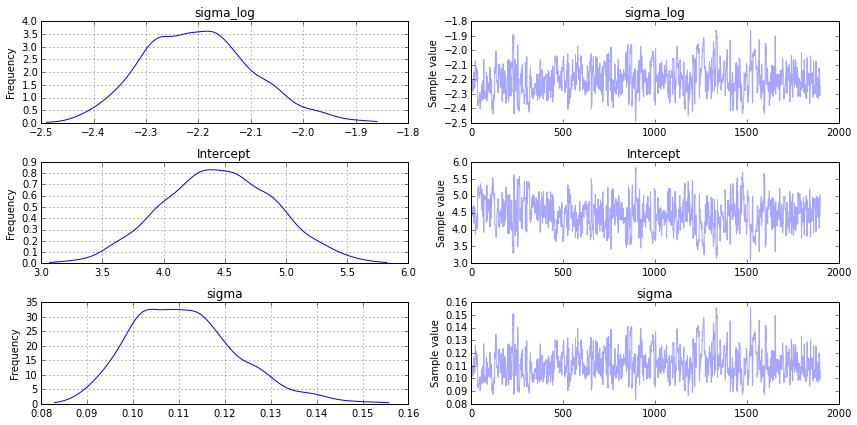

In [8]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

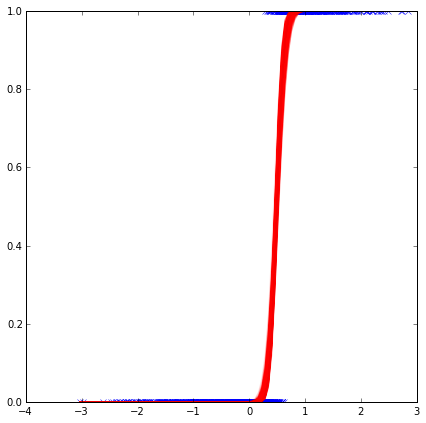

In [9]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
xp = np.linspace(x.min(),x.max(),100)
yp = np.asarray(phi(xp/s_true - a_true))
plt.plot(xp,yp)

for r in trace[100:]:
    yp = np.asarray(phi(xp/r['sigma'] - r['Intercept']))
    plt.plot(xp,yp,'r',alpha=0.1)


In [35]:
help(phi)

Help on function phi in module utils:

phi(x, mu=0, sd=1)
    Cumulative Gaussian function evaluated at x for parameters mu, sd

